<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> Gate & Circuit Identities </b></h1>
  <h2> Quantum Circuit Theory and Implementations </h2>
</div>
<br>

<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/quantum-circuit-theory"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

---
See the [algebraic_identities.ipynb](https://github.com/QuCAI-Lab/quantum-circuit-theory/blob/dev/notebooks/algebraic_identities.ipynb) for the necessary algebraic identities used in the proof of the following gate identities.

For more identities, refer to the [qc_identities.pdf](https://github.com/QuCAI-Lab/quantum-circuit-theory/blob/dev/notebooks/qc_identities.pdf).

---

In [1]:
%run 10_implementations.ipynb

Author: Lucas Camponogara Viera

Github username: camponogaraviera

Website: https://qucai-lab.github.io/

Last updated: 2024-03-08

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.22.1

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 6.5.0-21-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git repo: https://github.com/QuCAI-Lab/quantum-circuit-theory.git

Git branch: dev

pylatexenc: 2.10
watermark : 2.3.1
IPython   : 8.22.1
matplotlib: 3.6.2
scipy     : 1.9.3
sympy     : 1.11.1
numpy     : 1.23.5
pennylane : 0.28.0

Watermark: 2.3.1

{'commit_hash': 'cf4a6f5b6',
 'commit_source': 'installation',
 'default_encoding': 'utf-8',
 'ipython_path': '/home/lucas/anaconda3/envs/qct/lib/python3.11/site-packages/IPython',
 'ipython_version': '8.22.1',
 'os_name': 'posix',
 'platform': 'Linux-6.5.0-21-generic-x86_64-with-glibc2.35',
 'sys_executable': '/home/lucas/anaconda3/envs/qct/bin/python',
 'sys_platfor

# Table of Contents

- Qiskit little-endian convention.
- Pauli gates.
- Single-qubit gates.
- Multi-qubit gates.
- Rotations.
- Conjugation by Unitary.  

# 1. Qiskit little-endian convention

In little-endian convention, higher qubit indices are more significant, i.e, the last qubit (highest register index) is stored first. In qiskit, one reads a circuit in a bottom-up approach, in the sense that a statevector $|abc\rangle$ has quantum registers 0, 1, 2 in states $|c\rangle$, $|b\rangle$, $|a\rangle$, respectively. Example: the state $|100\rangle$, in qiskit, corresponds to a quantum circuit with the first qubit in state $|0\rangle$, the middle qubit in state $|0\rangle$, and the last qubit in state $|1\rangle$.

## Circuit example 1

Consider the following circuit:

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2)) 



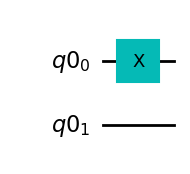

In [3]:
backend = Aer.get_backend('unitary_simulator')
dec = 2                                # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit')
qc.x(0)                                # Apply the Pauli-X gate on qubit 0.
print(Statevector.from_instruction(qc), '\n')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, dec)
qc.draw(output='mpl')

In [3]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In little-endian convention, the circuit above has the following unitary operator:

$$\hat{U} = \mathbb{I} \otimes X.$$

Such that 

$$\hat{U} |00\rangle = (\mathbb{I} \otimes X) (|0\rangle \otimes |0\rangle)=\mathbb{I}|0\rangle \otimes  X |0\rangle=|0\rangle \otimes |1\rangle =|01\rangle = [0,1,0,0].$$

In [4]:
# Operator I⊗X:
np.kron(sigma0, sigma1)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [5]:
np.kron(sigma0, sigma1)@np.kron(zero,zero).T #(I⊗X)|00>=|01>.

array([[0.],
       [1.],
       [0.],
       [0.]])

In [6]:
np.kron(zero,one).T #|01>.

array([[0],
       [1],
       [0],
       [0]])

## Circuit example 2

Consider the following circuit:

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2)) 



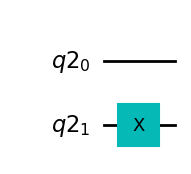

In [7]:
backend = Aer.get_backend('unitary_simulator')
dec = 2                                # Number of decimals for the matrix elements.
qr = QuantumRegister(2)                # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr, name='circuit')
qc.x(1)                                # Apply the Pauli-X gate on qubit 1.
print(Statevector.from_instruction(qc), '\n')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, dec)
qc.draw(output='mpl')

In [8]:
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

In little-endian convention, the circuit above has the following unitary operator:

$$\hat{U} = X \otimes \mathbb{I} .$$

Such that 

$$\hat{U} |00\rangle = ( X \otimes \mathbb{I}) (|0\rangle \otimes |0\rangle)= X|0\rangle \otimes  \mathbb{I} |0\rangle=|1\rangle \otimes |0\rangle =|10\rangle = [0,0,1,0].$$

In [9]:
# Operator X⊗I:
np.kron(sigma1, sigma0) 

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

np.kron(sigma1, sigma0)@np.kron(zero,zero).T #(X⊗I)|00>=|10>.

In [10]:
np.kron(one,zero).T #|10>.

array([[0],
       [0],
       [1],
       [0]])

# 2. Pauli gates

Recall from Pauli algebra:

$$\sigma_j \sigma_k = \delta_{jk} \mathbb{I} + i\epsilon_{jkl} \sigma_l.$$

One can then write:

\begin{align}
YZ = \sigma_2 \sigma_3 &= \delta_{23} \mathbb{I} + i\epsilon_{231} \sigma_1 = i\sigma_1 = i X. \\
\implies X &= -iYZ.
\end{align}

\begin{align}
ZY = \sigma_3\sigma_2 &= \delta_{32}\mathbb{I}+i\epsilon_{321}\sigma_1 = -i\sigma_1 = -iX.\\
\implies X &= iZY.
\end{align}

\begin{align}
ZX = \sigma_3 \sigma_1 &= \delta_{31} \mathbb{I} + i\epsilon_{312} \sigma_2 = i\sigma_2 = i Y. \\
\implies Y &= -iZX.
\end{align}

\begin{align}
XZ = \sigma_1\sigma_3 &= \delta_{13}\mathbb{I}+i\epsilon_{132}\sigma_2 = -i\sigma_2 = -iY.\\
\implies Y &= iXZ.
\end{align}

# 3. Single-qubit gates

1. $P(\lambda) = e^{i\lambda/2}R_z(\lambda)$
2. $Z=e^{i\pi/2}R_z(\pi) = P(\lambda = \pi)$.
3. $S=e^{i\pi/4}R_z(\pi/2) = P(\lambda = \pi/2)$.
4. $T=e^{i\pi/8}R_z(\pi/4) = P(\lambda =\pi/4)$.
5. $Y^{1/2} = R_y (\pi/2) = \sqrt{Y}$.
6. $Y^{-1/2} = R_y (-\pi/2) = (Y^{1/2})^{\dagger}$.
7. $H=R_y(\pi/2)Z = Y^{1/2}Z$. 
8. $H=R_y(-\pi/2)X=Y^{-1/2}X$.
9. $H=iR_x(\pi)R_y(\pi/2)$.
10. $R_x(\theta) = R_z(\pi/2) R_y(\theta) R_z(-\pi/2)$

## 3.1 Proofs

- Recall Euler's formula: $$e^{i\theta} = cos(\theta)+isin(\theta).$$

- Euler's identity then follows: 

\begin{eqnarray}
e^{i\pi} &=& cos(\pi)+isin(\pi)=-1+i\cdot 0=-1.\\
e^{i\pi/2}&=& i.
\end{eqnarray}

From that,
\begin{eqnarray}
e^{i\pi} &=& cos(\pi)+isin(\pi)=-1+i\cdot 0=-1. \\
\implies (e^{i\pi})^n &=& e^{in\pi}= cos(n\pi)+isin(n\pi) =-1^n.\\
\implies sin(n\pi)&=&0. \\
\implies cos(n\pi)&=&-1^n. \\
\end{eqnarray}

1.

\begin{align}
P(\lambda)\equiv e^{i\lambda/2}R_z(\lambda) =
e^{i\lambda/2}
\begin{bmatrix} 
e^{-i\lambda/2} & 0 \\ 0 & e^{i\lambda/2}
\end{bmatrix}
= 
\begin{bmatrix} 
e^{i\lambda (1/2-1/2)} & 0 \\ 0 & e^{i\lambda(1/2+1/2)}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\ 0 & e^{i\lambda}
\end{bmatrix}.
\end{align}

2. 

\begin{align}
e^{i\pi/2}R_z(\pi) =i
\begin{bmatrix} 
e^{-i\pi/2} & 0 \\0 & e^{i\pi/2}
\end{bmatrix}
= i
\begin{bmatrix} 
cos(-\frac{\pi}{2})+isin(-\frac{\pi}{2}) & 0 \\0 & cos(\frac{\pi}{2})+isin(\frac{\pi}{2})
\end{bmatrix}
=i
\begin{bmatrix} 
0-i & 0 \\0 & 0+i
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0 \\ 0 & -1
\end{bmatrix}
=P(\lambda = \pi) = Z.
\end{align}

3. 

\begin{align}
e^{i\pi/4}R_z(\pi/2) =
e^{i\pi/4}
\begin{bmatrix} 
e^{-i\pi/4} & 0 \\ 0 & e^{i\pi/4}
\end{bmatrix}
= 
\begin{bmatrix}
1 & 0 \\ 0 & e^{i\pi/2}
\end{bmatrix}
=
P(\lambda = \pi/2)
=
\begin{bmatrix}
1 & 0 \\ 0 & i
\end{bmatrix}
=S.
\end{align}

4. 

\begin{align}
e^{i\pi/8} R_z(\pi/4) = e^{i\pi/8} 
\begin{bmatrix} e^{- i\pi/8} & 0 \\0 & e^{i\pi/8}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\ 0 & e^{i\pi/4}
\end{bmatrix}
= P(\lambda =\pi/4) = T.
\end{align}

5. 

\begin{align}
R_y(\pi/2) =
\begin{bmatrix} 
\cos(\pi/4) & -\sin(\pi/4) \\ \sin(\pi/4) & \cos(\pi/4) 
\end{bmatrix}
= 
\begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
 = Y^{1/2}.
\end{align}

6. 

\begin{align}
R_y(-\pi/2) =
\begin{bmatrix} 
\cos(\pi/4) & \sin(\pi/4) \\ -\sin(\pi/4) & \cos(\pi/4) 
\end{bmatrix} 
= 
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
 = Y^{-1/2}.
\end{align}

7. 

\begin{align}
R_y(\pi/2)Z =
\begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\ 0 & -1
\end{bmatrix}
= \begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}
= H.
\end{align}

8. 

\begin{align}
R_y(-\pi/2)X =
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\begin{bmatrix}
0 & 1 \\ 1 & 0
\end{bmatrix}
= \begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}
= H.
\end{align}

9. 

\begin{align}
iR_x(\pi)R_y(\pi/2) &=
i \begin{bmatrix} \cos(\pi/2) & - i\sin(\pi/2) \\ - i\sin(\pi/2) & \cos(\pi/2) \end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\\
&= i \begin{bmatrix} 0 & - i \\ - i & 0 \end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\\
&= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix}
\\
&= \begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}
= H.
\end{align}

In [4]:
# sin(npi) = sin(0) = sin(π) = sin(2π) = 0.
(np.sin(np.pi)).round(2) == 0

True

In [ ]:
# cos(π) = -1.
(np.cos(np.pi)).round(2) == -1

True

In [ ]:
# sin(π/2) = 1.
(np.sin(np.pi/2)).round(2) == 1

True

In [ ]:
# cos(π/2) = 0.
(np.cos(np.pi/2)).round(2) == 0

True

In [ ]:
# sin(π/4) = cos(π/4) = 1/√2.
(np.sin(np.pi/4)).round(3) == (1/np.sqrt(2)).round(3)

True

# 4. Multi-qubit gates

For a graphical visualization, refer to the [qc_identities.pdf](https://github.com/QuCAI-Lab/quantum-circuit-theory/blob/dev/notebooks/qc_identities.pdf).

# 5. Rotations

Let $R_{\hat{n}}(\theta)$ be the single-qubit standard rotation gate $R_{\hat{n}}(\theta)$ performing an arbitrary angle of $\theta$ radians around an arbitrary $\hat{n}$ axis of the Bloch sphere.

The following identities hold:

- 1) Product of two rotations: $$R_{\hat{n}}(\theta_1)R_{\hat{n}}(\theta_2)=R_{\hat{n}}(\theta_1+\theta_2).$$

- 2) Tensor product of rotations: $$R_{\hat{n}_j}(\theta_1) \otimes R_{\hat{n}_k}(\theta_2)= e^{-\frac{i}{2}((\theta_1\hat{\sigma}_j) \otimes \mathbb{I}+\mathbb{I} \otimes (\theta_2\hat{\sigma}_k))}.$$

Let $X$ and $Z$ represent the Pauli-X and Pauli-Z gates, respectively, and $R_y$ be the single-qubit standard rotation gate around the y-axis.

- 1) Rotating $Z$ to $X$: $$R_y(\pi/2) Z R_y(-\pi/2) = X.$$

- 2) Rotating $Z\otimes Z$ to $X\otimes X$: $$(R_y(\pi/2) \otimes R_y(\pi/2)) (Z\otimes Z) (R_y(-\pi/2) \otimes R_y(-\pi/2)) = X\otimes X.$$

## 5.1 Proofs

### $R_{\hat{n}}(\theta_1)R_{\hat{n}}(\theta_2)=R_{\hat{n}}(\theta_1+\theta_2)$

$$R_{\hat{n}}(\theta_2)R_{\hat{n}}(\theta_1)=e^{-i(\hat{n}\cdot \vec{\sigma})\theta_2/2}e^{-i(\hat{n}\cdot \vec{\sigma})\theta_1/2}.$$

Now, since $[\theta_1(\hat{n}\cdot\vec{\sigma}),\theta_2(\hat{n}\cdot\vec{\sigma})]=\mathbb{O}$, one can use $e^{At_1}e^{Bt_2}=e^{(At_1+Bt_2)}$ to obtain

$$R_{\hat{n}}(\theta_2)R_{\hat{n}}(\theta_1)=e^{-i(\hat{n}\cdot \vec{\sigma})\theta_2/2}e^{-i(\hat{n}\cdot \vec{\sigma})\theta_1/2} = e^{-i(\hat{n}\cdot \vec{\sigma}) (\theta_1+\theta_2)/2}=R_{\hat{n}}(\theta_1+\theta_2).$$

Q.E.D.

### $R_{y}(\theta_1)R_{y}(\theta_2)=R_{y}(\theta_1+\theta_2).$

It follows directly from $$R_{\hat{n}}(\theta_2)R_{\hat{n}}(\theta_1)=R_{\hat{n}}(\theta_1+\theta_2).$$

### $R_{\hat{n}_j}(\theta_1) \otimes R_{\hat{n}_k}(\theta_2)= e^{-\frac{i}{2}((\theta_1\hat{\sigma}_j) \otimes \mathbb{I}+\mathbb{I} \otimes (\theta_2\hat{\sigma}_k))}$

$$R_{\hat{n}_j}(\theta_1) \otimes R_{\hat{n}_k}(\theta_2)=e^{-i(\hat{n}_j\cdot \vec{\sigma})\theta_1/2} \otimes e^{-i(\hat{n}_k\cdot \vec{\sigma})\theta_2/2},$$

and using $e^A \otimes e^B=e^{A \otimes \mathbb{I}_n} e^{\mathbb{I}_m \otimes B}=e^{A \otimes \mathbb{I}_n + \mathbb{I}_m \otimes B},$ one gets

$$R_{\hat{n}_j}(\theta_1) \otimes R_{\hat{n}_k}(\theta_2)=e^{-i(\hat{n}_j\cdot \vec{\sigma})\theta_1/2} \otimes e^{-i(\hat{n}_k\cdot \vec{\sigma})\theta_2/2} = e^{-\frac{i}{2}((\theta_1\hat{\sigma}_j) \otimes \mathbb{I}+\mathbb{I} \otimes (\theta_2 \hat{\sigma}_k))}.$$

Q.E.D.

### $R_y(\pi/2) Z R_y(-\pi/2) = X$

**Verifying with NumPy:**

In [ ]:
((ry_pi2@sigma3@ry_mpi2).round() == sigma1).all() # Ry(π/2) ⋅ Z ⋅ Ry(−π/2) = X.

True

### $(R_y(\pi/2) \otimes R_y(\pi/2)) (Z\otimes Z) (R_y(-\pi/2) \otimes R_y(-\pi/2)) = X\otimes X$

Using the associative property $ABC = (AB)C$, one writes

\begin{align}
(R_y(\pi/2) \otimes R_y(\pi/2)) (Z\otimes Z) (R_y(-\pi/2) \otimes R_y(-\pi/2))=&\\
\bigg[\big(R_y(\pi/2) \otimes R_y(\pi/2)\big) \big(Z\otimes Z \big)\bigg] \bigg(R_y(-\pi/2) \otimes R_y(-\pi/2)\bigg)=&
\end{align}

and using the mixed product property $(A\otimes B)(C\otimes D) = AC\otimes BD$, one gets

\begin{align}
\bigg[\bigg(R_y(\pi/2)Z\bigg) \otimes \bigg(R_y(\pi/2)Z\bigg)\bigg] \bigg(R_y(-\pi/2) \otimes R_y(-\pi/2)\bigg)
=&\\
\bigg(R_y(\pi/2)ZR_y(-\pi/2)\bigg) \otimes \bigg(R_y(\pi/2)ZR_y(-\pi/2)\bigg)=&\\
=& X\otimes X.
\end{align}

Q.E.D.

**Verifying with NumPy:**

In [ ]:
ZZ = np.kron(sigma3,sigma3)
XX = np.kron(sigma1,sigma1)
RY1=np.kron(ry_pi2,ry_pi2)
RY2=np.kron(ry_mpi2,ry_mpi2)

(((RY1)@(ZZ)@(RY2)).round()==XX).all()

True

In [ ]:
#Left Hand side (LHS):

((RY1)@(ZZ)@(RY2)).round() # (Ry(π/2)⊗Ry(π/2)) ⋅ (Z⊗Z) ⋅ (Ry(−π/2)⊗Ry(−π/2)) = X⊗X.

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  1.,  0., -0.],
       [ 1., -0., -0.,  0.]])

In [ ]:
#Right Hand side (RHS):

XX # X⊗X.

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

### $X \otimes X = (X \otimes X)^{\dagger}$

**Hermitian property of Pauli X.**

**Matrix approach:**

\begin{eqnarray}
\sigma_{j=1} &\equiv& X \doteq
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}.\\
X\otimes X &=&
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\otimes 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
=
\begin{bmatrix} 
0
\begin{bmatrix} 
0 & 1 \\
1 & 0
\end{bmatrix}
1
\begin{bmatrix} 
0 & 1 \\
1 & 0
\end{bmatrix}\\
1
\begin{bmatrix} 
0 & 1 \\
1 & 0
\end{bmatrix}
0
\begin{bmatrix} 
0 & 1 \\
1 & 0
\end{bmatrix} 
\end{bmatrix}
=
\begin{bmatrix} 
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{bmatrix}.\\
(X\otimes X)^{\dagger} &=& {\Bigg[(X\otimes X)^{T}\Bigg]}^* =
\begin{bmatrix} 
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{bmatrix}^*
=
\begin{bmatrix} 
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{bmatrix}
= X\otimes X.
\end{eqnarray}

Q.E.D.

**Verifying with NumPy:**

In [ ]:
(np.kron(sigma1, sigma1) == np.kron(sigma1, sigma1).conj().T).all() 

True

In [ ]:
np.kron(sigma1, sigma1)

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
np.kron(sigma1, sigma1).conj().T

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

### Special cases

- $S=Z^{1/2}=\sqrt{Z}$.

\begin{align}
S^2 =
\begin{bmatrix}
1 & 0 \\ 0 & i
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\ 0 & i
\end{bmatrix}
=
\begin{bmatrix} 
1 & 0 \\ 0 & -1
\end{bmatrix}
=Z \implies Z^{1/2} = S.
\end{align}

- $S^{\dagger}=P(\lambda = -\pi/2)$.

$$S^{\dagger}=P(\lambda = -\pi/2).$$

- $T=S^{1/2}=\sqrt{S} = Z^{1/4}$.


\begin{align}
T^2 =
\begin{bmatrix}
1 & 0 \\ 0 & e^{i\pi/4}
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\ 0 & e^{i\pi/4}
\end{bmatrix}
=
\begin{bmatrix} 
1 & 0 \\ 0 & e^{i\pi/2}
\end{bmatrix}
=
\begin{bmatrix} 
1 & 0 \\ 0 & i
\end{bmatrix}
=S \implies S^{1/2} = T.
\end{align}

- $T^{\dagger}=P(\lambda = -\pi/4).$

# 6. Conjugation by Unitary

Consider a Unitary matrix $U$, and a matrix $P$. The conjugation by a Unitary matrix is defined as:

$$UPU^{\dagger}.$$ 

This transformation modifies the eigenstates of the $P$ matrix while leaving its eigenvalues unchanged.

This transformation is also useful to map an element $P$ of the Pauli group $P_n$ to another element of the Pauli group. It is also used to represent some of the conjugation by Cliffords in terms of tensor products of Paulis given the fact that Pauli gates share the same set of eigenvalues.

- $UR_x(\theta)U^{\dagger} = e^{\frac{\theta}{2}UXU^{\dagger}}$

## Conjugation by Clifford

Definitions: $V = \sqrt(X)$, $P=\sqrt(Z)$, and $T=\sqrt(P)$.

- $P = HVH $
- $V = HPH $
- $SXS^† = Y$
- $SYS^† = -X$
- $SZS^† = Z$
- $ZXZ = -X$
- $XYX = -Y$
- $XZX = -Z$
- $X R_y(\theta) X = R_y(-\theta)$ (Appears in ex. 4.7, Pg. 175 of Ref. [1])
- $X R_z(\theta) X = R_z(-\alpha)$
- $HXH=Z$
- $HYH=-Y$
- $HZH=X$
- $HTH=R_x(\pi/4)$
- $(H\otimes H) CNOT_{(0,1)}(H\otimes H) = CNOT_{(1,0)}$ 
- $CZ(X \otimes I)CZ^{\dagger} = X \otimes Z$
- $(I_2 \otimes S)e^{i\frac{\theta}{2} (X\otimes X)}(I_2 \otimes S^{\dagger})=e^{i\frac{\theta}{2} (X\otimes Y)}$ 
- $CNOT_{(j,k)}(X\otimes I_2) CNOT_{(j,k)} = X \otimes X$ 
- $CNOT_{(j,k)} (R_{\hat{n}}(\theta)\otimes I_2)CNOT_{(j,k)}=e^{i\frac{\theta}{2}((\vec{\sigma} \cdot \hat{n})\otimes (\vec{\sigma}\cdot \hat{n}))}$
- $CNOT_{(1,2)} X_1 CNOT_{(1,2)}^† = X_1 \otimes X_2$
- $CNOT_{(1,2)} X_2 CNOT_{(1,2)}^† = X_2$
- $CNOT_{(1,2)} Z_1 CNOT_{(1,2)}^† = Z_1$
- $CNOT_{(1,2)} Z_2 CNOT_{(1,2)}^† = Z_1 \otimes Z_2$

See pg. 460 of [1].

## Conjugation by non-Clifford

- From pg. 462 of [1]:

- $TZT^† = Z$
- $TXT^† = \frac{(X+Y)}{\sqrt(2)}$

## 6.1 Proofs

- Notation: $\sigma_1=X, \sigma_2=Y, \sigma_3=Z$.
  
Recall that a tensor product of unitary matrices yields another unitary matrix. See the [0_algebraic_identities.ipynb](https://github.com/QuCAI-Lab/quantum-circuit-theory/blob/dev/notebooks/algebraic_identities.ipynb) notebook for the proof.

### $SXS^† = Y$

### $SYS^† = -X$

### $SZS^† = Z$

### $ZYZ = -Y$.

- **Matrix approach:**

\begin{equation}
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\cdot 
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\cdot 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
=
\begin{pmatrix}
0 & i \\
-i & 0
\end{pmatrix}
= -Y.
\end{equation}

In [ ]:
(sigma3@sigma2@sigma3 == -sigma2).all()

True

- **Algebraic approach:**

Using the Pauli algebra

$$\sigma_j \sigma_k = \delta_{jk} \mathbb{I} + i\epsilon_{jkl} \sigma_l,$$

one has 

$$YZ=\sigma_2\sigma_3 = \delta_{23}\mathbb{I}+i\epsilon_{231}\sigma_1 = 0\cdot\mathbb{I}+i\cdot \sigma_1 = i\sigma_1 = iX.$$

Then

$$ZYZ=Z(iX)=iZX.$$

Applying Pauli identity again, one finally gets

$$iZX = i\sigma_3\sigma_1 = i(\delta_{31}\mathbb{I}+i\epsilon_{312}\sigma_2) = i(0+i\sigma_2) = -\sigma_2 = -Y.$$

### $ZXZ = -X$

- **Matrix approach:**

\begin{equation}
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} 
\cdot 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} 
=
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} 
\cdot
\begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix} 
=
\begin{pmatrix}
0 & -1 \\
-1 & 0
\end{pmatrix}
= -X.
\end{equation}

In [23]:
(sigma3@sigma1@sigma3 == -sigma1).all()

True

- **Algebraic approach:**

Using the Pauli algebra

$$\sigma_j \sigma_k = \delta_{jk} \mathbb{I} + i\epsilon_{jkl} \sigma_l,$$

one has 

$$XZ=\sigma_1\sigma_3 = \delta_{13}\mathbb{I}+i\epsilon_{132}\sigma_2 = 0\cdot\mathbb{I}-i\cdot \sigma_2 = -i\sigma_2 = -iY.$$

Then

$$ZXZ=Z(-iY)=-iZY.$$

Applying it again, one finally gets

$$-iZY = -i\sigma_3\sigma_2 = -i(\delta_{32}\mathbb{I}+i\epsilon_{321}\sigma_1) = -i(0-i\sigma_1) = -\sigma_1 = -X.$$

$ZX=iY=-XZ$ (Anti-commutation).

### $XYX = -Y$

- **Matrix approach:**

\begin{equation}
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
-i & 0 \\
0 & i
\end{pmatrix}
=
\begin{pmatrix}
0 & i \\
-i & 0
\end{pmatrix}
= -Y.
\end{equation}

In [24]:
(sigma1@sigma2@sigma1 == -sigma2).all()

True

- **Algebraic approach:**

Using the Pauli algebra

$$\sigma_j \sigma_k = \delta_{jk} \mathbb{I} + i\epsilon_{jkl} \sigma_l,$$

one has 

$$YX=\sigma_2\sigma_1 = \delta_{21}\mathbb{I}+i\epsilon_{213}\sigma_3 = 0\cdot\mathbb{I}-i\cdot \sigma_3 = -i\sigma_3 = -iZ.$$

Then

$$XYZ=X(-iZ)=-iXZ.$$

Applying it again, one finally gets

$$-iXZ = -i\sigma_1\sigma_3 = -i(\delta_{13}\mathbb{I}+i\epsilon_{132}\sigma_2) = -i(0-i\sigma_2) = -\sigma_2 = -Y.$$

### $XZX = -Z$

- **Matrix approach:**

\begin{equation}
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\cdot 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\cdot 
\begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
=
\begin{pmatrix}
-1 & 0 \\
0 & 1
\end{pmatrix}
= -Z.
\end{equation}

In [25]:
(sigma1@sigma3@sigma1 == -sigma3).all()

True

- **Algebraic approach:**

Using the Pauli algebra

$$\sigma_j \sigma_k = \delta_{jk} \mathbb{I} + i\epsilon_{jkl} \sigma_l,$$

it follows the same thought process as the previous solutions.

### $X R_y(\theta) X = R_y(-\theta)$

### $X R_z(\theta) X = R_z(-\alpha)$

### $HXH=Z$

- $H=\frac{1}{\sqrt{2}}(X+Z)$.
- $\sigma_j^2 = -i\sigma_1\sigma_2\sigma_3=\mathbb{I}$ (Involutory square matrices).
- $ZXZ=-X$.

$$HXH=\Big(\frac{1}{\sqrt{2}}\Big)^2(X+Z)X(X+Z)=\frac{1}{2}(X+Z)(XX+XZ)=\frac{1}{2}(X+Z)(\mathbb{I}+XZ).$$

Using algebraic identity 

$$(A+B)(C+D) = AC+AD+BC+BD,$$ 

one then has

$$HXH = \frac{1}{2}(X+X^2Z+Z+ZXZ) = \frac{1}{2}(X+Z+Z+ZXZ) = \frac{1}{2}(X+2Z+ZXZ)=\frac{1}{2}(X+2Z-X)=Z.$$

In [26]:
((had@sigma1@had).round() == sigma3).all()

True

### $HYH=-Y$

- $H=\frac{1}{\sqrt{2}}(X+Z)$.
- $\sigma_j^2 = -i\sigma_1\sigma_2\sigma_3=\mathbb{I}$ (Involutory square matrices).

$$HYH=\Big(\frac{1}{\sqrt{2}}\Big)^2(X+Z)Y(X+Z)=\frac{1}{2}(X+Z)(YX+YZ).$$

Using algebraic identity 

$$(A+B)(C+D) = AC+AD+BC+BD,$$ 

one then has

$$\frac{1}{2}(XYX+XYZ+ZYX+ZYZ).$$

Using the results 

\begin{eqnarray}
XYX = ZYZ &=& -Y \\
XYZ &=& i\mathbb{I} \\
ZYX &=& -i\mathbb{I}, \\
\end{eqnarray}

one finally gets

$$HYH = \frac{1}{2}(-Y+i\mathbb{I}-i\mathbb{I}-Y) =-Y.$$

In [27]:
((had@sigma2@had).round() == -sigma2).all()

True

### $HZH=X$

- $H=\frac{1}{\sqrt{2}}(X+Z)$.
- $\sigma_j^2 = -i\sigma_1\sigma_2\sigma_3=\mathbb{I}$ (Involutory square matrices).
- $XZX=-Z$.

$$HZH=\Big(\frac{1}{\sqrt{2}}\Big)^2(X+Z)Z(X+Z)=\frac{1}{2}(X+Z)(ZX+ZZ)=\frac{1}{2}(X+Z)(ZX+\mathbb{I}).$$

Using algebraic identity 

$$(A+B)(C+D) = AC+AD+BC+BD,$$ 

one then has

$$HZH = \frac{1}{2}(XZX+X+Z^2X+Z).$$

And since $Z^2=\mathbb{I}$ and $XZX=-Z$, one finally gets

$$HZH=\frac{1}{2}(-Z+2X+Z) = X.$$

In [28]:
((had@sigma3@had).round() == sigma1).all()

True

### $HTH=R_x(\pi/4)$

Using the result (which was verified earlier) 

$$T=e^{i\pi/8}R_z(\pi/4) = P(\lambda =\pi/4),$$

one writes

$$HTH = e^{i\pi/8} H R_z(\pi/4) H.$$

And using the result $ R_{\hat{n}}(\theta) = e^{-i\frac{\theta}{2} A}$ to write

$$ R_z(\pi/4) = e^{-i\pi Z/8},$$

one gets

\begin{eqnarray}
HTH &=& e^{i\pi/8} H e^{-i\pi Z/8} H.
\end{eqnarray}

From here, one uses the Taylor series expansion for the exponential function of a square matrix (see [0_algebraic_identities.ipynb](#)):

\begin{eqnarray}
HTH &=& e^{i\pi/8} H e^{-i\pi Z/8} H \\
&=& e^{i\pi/8} H \Big(\sum_{n=0}^{\infty}\frac{(-i\pi Z/8)^{n}}{n!}\Big) H \\
&=& e^{i\pi/8} H \Big(\mathbb{I} - \frac{i\pi Z}{8}+\frac{1}{2!}\Big(\frac{i\pi Z}{8}\Big)^2 + \cdots\Big) H \\
&=& e^{i\pi/8} \Big(H\mathbb{I}H - H\frac{i\pi Z}{8}H+H\frac{1}{2!}\Big(\frac{i\pi Z}{8}\Big)^2H + \cdots\Big) \\
&=& e^{i\pi/8} \Big(H^2 - \frac{i\pi}{8}HZH+\frac{1}{2!}\Big(\frac{i\pi}{8}\Big)^2HZ^2H + \cdots\Big) \\
&=& e^{i\pi/8} \Big(\mathbb{I} - \frac{i\pi}{8}X+\frac{1}{2!}\Big(\frac{i\pi}{8}\Big)^2 HZH HZH + \cdots\Big) \\
&=& e^{i\pi/8} \Big(\mathbb{I} - \frac{i\pi}{8}X+\frac{1}{2!}\Big(\frac{i\pi}{8}\Big)^2 X^2 + \cdots\Big) \\
&=&  e^{i\pi/8}e^{-i\pi X/8}\\
&=&e^{i\pi/8} R_x\Big(\frac{\pi}{4}\Big).
\end{eqnarray}

### $(H\otimes H) CNOT_{(0,1)}(H\otimes H) = CNOT_{(1,0)}$ 

[Phase kickback](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-gates/phase-kickback.ipynb).

Recall the mixed product property $(A\otimes B)(C\otimes D) = AC\otimes BD$.

\begin{align}
(H\otimes H) \Big(\mathbb{I} \otimes |0\rangle\langle 0| + X \otimes |1 \rangle \langle 1|\Big) (H\otimes H)
&= (H\otimes H) \Big(\mathbb{I} \otimes |0\rangle\langle 0| \Big) (H\otimes H)  + (H\otimes H) \Big(X \otimes |1 \rangle \langle 1|\Big) (H\otimes H) \\
&= \Big(H\mathbb{I} \otimes H|0\rangle\langle 0| \Big) (H\otimes H)  + \Big(HX \otimes H|1 \rangle \langle 1|\Big) (H\otimes H)\\
&= \Big(H\mathbb{I}H \otimes H|0\rangle\langle 0|H \Big) + \Big(HXH \otimes H|1 \rangle \langle 1|H\Big)\\
&= \Big(\mathbb{I} \otimes H|0\rangle\langle 0|H \Big) + \Big(Z \otimes H|1 \rangle \langle 1|H\Big).
\end{align}

Computing the matrix products one can verify it is identical to the $CNOT_{10}$ gate:

$$CX^{q_1q_0}=|0\rangle\langle 0|\otimes \mathbb{I} +|1\rangle\langle 1|\otimes X.$$

- **Verifying with NumPy:**

In [13]:
# Left hand side:

(np.kron(had,had)@cnot_01@np.kron(had,had)).round().astype("uint8")

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [14]:
# Right hand side:

(np.kron(sigma0,had@outzero@had) + np.kron(sigma3,had@outone@had)).round().astype("uint8")

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [15]:
# CNOT_10: 

np.kron(outzero,sigma0)+np.kron(outone,sigma1)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [16]:
# HXH = Z.

((had@sigma1@had).round() == sigma3).all() 

True

- **Verifying with Qiskit:**

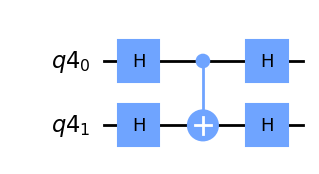

In [20]:
# Left hand side:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.h(0),qc.h(1), qc.cnot(0,1), qc.h(0),qc.h(1)
qc.draw(output='mpl')

In [21]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, 2)
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

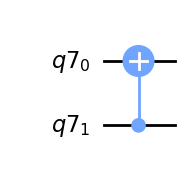

In [22]:
# Right hand side:

qr = QuantumRegister(2) # Define the number of qubits in the quantum circuit.
qc = QuantumCircuit(qr) # Create the circuit.
qc.cnot(1,0)
qc.draw(output='mpl')  

In [23]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend, shots=4000)
result = job.result()
unitary = result.get_unitary(qc, 2)
array_to_latex(unitary, prefix="\\text{Unitary Matrix = }\n")

<IPython.core.display.Latex object>

### $UR_x(\theta)U^{\dagger} = e^{i \frac{\theta}{2} UXU^{\dagger}}$

# References &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> 


\[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 
- Chapter 4.

\[2] Barenco, A., Bennett, C.H., Cleve, R., DiVincenzo, D.P., Margolus, N., Shor, P., Sleator, T., Smolin, J.A. and Weinfurter, H. (1995) Elementary gates for quantum computation. [Phys. Rev. A 52, 3457–3467](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.52.3457).
